In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Lufthansa/Lufthansa(SKG_VIE).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,17:30:00,13:10:00,0,6,1,2,1,111,260.94
1,17:30:00,11:50:00,0,6,1,2,1,111,279.35
2,17:30:00,13:10:00,0,6,1,2,1,111,280.94
3,17:30:00,19:40:00,0,6,1,1,1,110,407.56
4,15:35:00,16:05:00,0,6,1,2,1,222,410.94


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6091 entries, 0 to 6090
Data columns (total 9 columns):
departure_time      6091 non-null object
arrival_time        6091 non-null object
days_before         6091 non-null int64
day_of_week         6091 non-null int64
num_of_luggage      6091 non-null int64
num_of_stops        6091 non-null int64
overnight_flight    6091 non-null int64
Class               6091 non-null int64
price               6091 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 428.4+ KB


In [7]:
df.shape

(6091, 9)

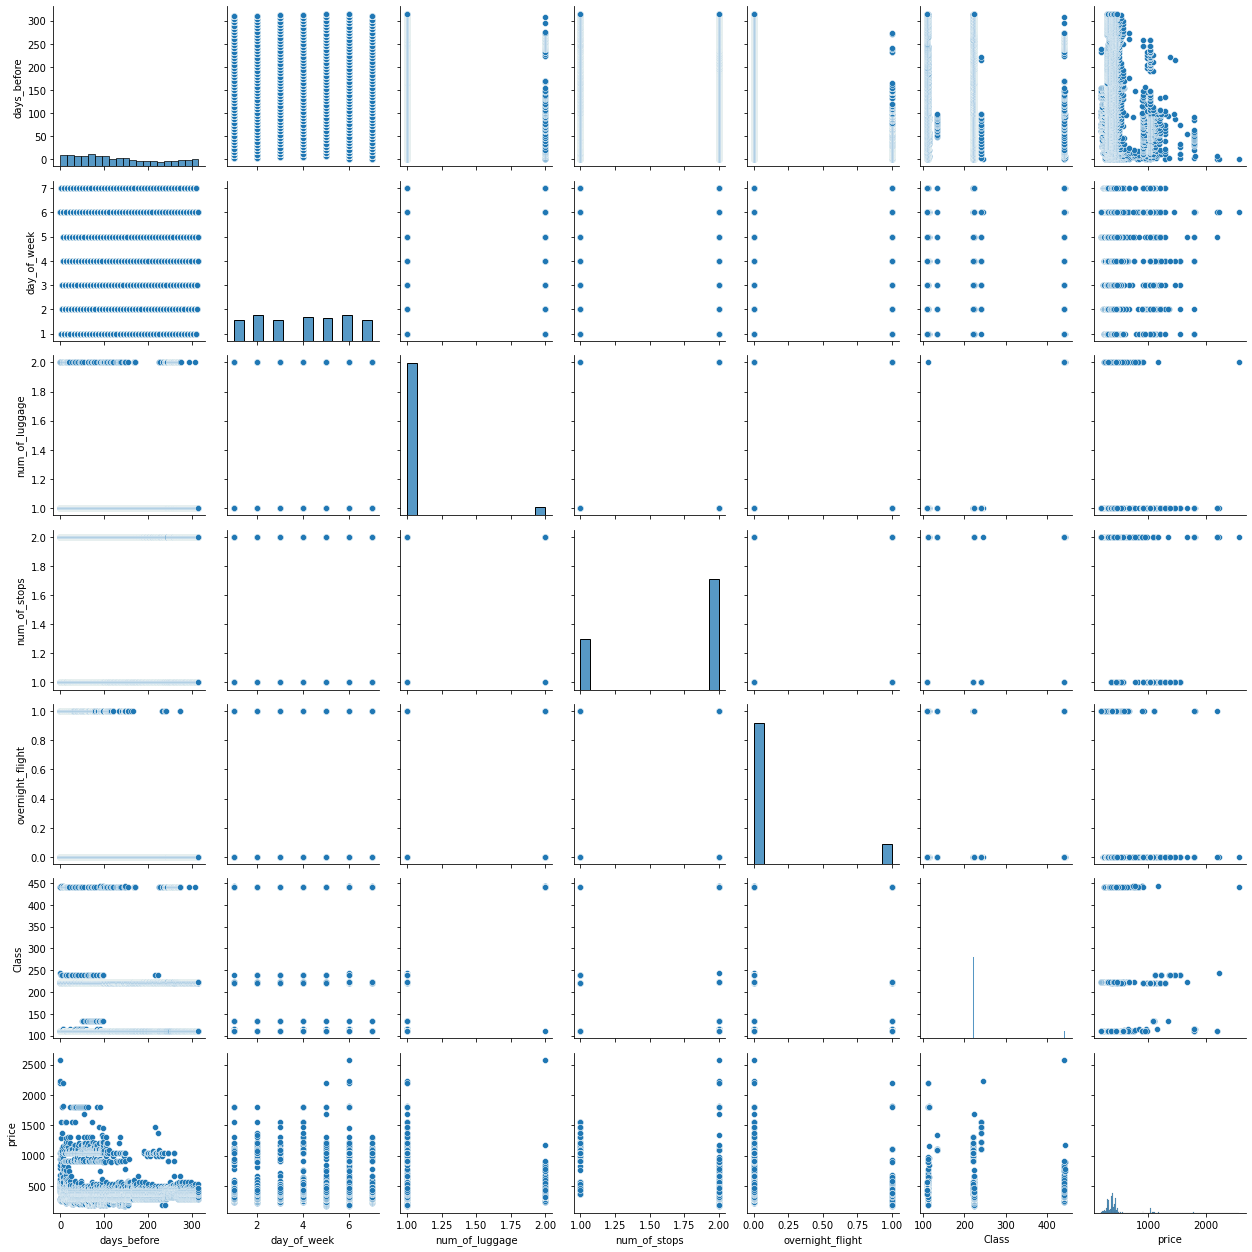

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 17:30:00,1900-01-01 13:10:00,0,6,1,2,1,111,260.94
1,1900-01-01 17:30:00,1900-01-01 11:50:00,0,6,1,2,1,111,279.35
2,1900-01-01 17:30:00,1900-01-01 13:10:00,0,6,1,2,1,111,280.94
3,1900-01-01 17:30:00,1900-01-01 19:40:00,0,6,1,1,1,110,407.56
4,1900-01-01 15:35:00,1900-01-01 16:05:00,0,6,1,2,1,222,410.94


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 17:30:00,1900-01-01 13:10:00,0,6,1,2,1,111,260.94,-2208925800000000000,-2208941400000000000
1,1900-01-01 17:30:00,1900-01-01 11:50:00,0,6,1,2,1,111,279.35,-2208925800000000000,-2208946200000000000
2,1900-01-01 17:30:00,1900-01-01 13:10:00,0,6,1,2,1,111,280.94,-2208925800000000000,-2208941400000000000
3,1900-01-01 17:30:00,1900-01-01 19:40:00,0,6,1,1,1,110,407.56,-2208925800000000000,-2208918000000000000
4,1900-01-01 15:35:00,1900-01-01 16:05:00,0,6,1,2,1,222,410.94,-2208932700000000000,-2208930900000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,6,0,1,2,1,111,260.94
1,6,0,1,2,1,111,279.35
2,6,0,1,2,1,111,280.94
3,6,0,1,1,1,110,407.56
4,6,0,1,2,1,222,410.94


In [21]:
df.to_csv('skg_vie_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [3]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.33059340866467724


In [4]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7040126006027623


In [5]:
bag_sc = r2_score(y_test,y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7028472633029679


In [6]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    
}

dtr = DecisionTreeRegressor(random_state=0)

grid_tree = GridSearchCV(estimator=dtr, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1,)
                           
grid_tree.fit(X_train,y_train)

y_pred = grid_tree.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Accuracy score of the predictions: 0.468350685924005


In [7]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.4445032641656541


In [8]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7081897838458355


In [9]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.03653337177806226


In [10]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.30319457016669815


In [11]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
153/153 [==============================] - 4s 4ms/step - loss: 86475.8984 - val_loss: 43878.3125
Epoch 2/200
153/153 [==============================] - 1s 3ms/step - loss: 72295.3906 - val_loss: 63977.7109
Epoch 3/200
153/153 [==============================] - 0s 3ms/step - loss: 71041.7031 - val_loss: 46805.6719
Epoch 4/200
153/153 [==============================] - 1s 3ms/step - loss: 69730.8750 - val_loss: 69467.8828
Epoch 5/200
153/153 [==============================] - 1s 4ms/step - loss: 68793.3984 - val_loss: 60695.4570
Epoch 6/200
153/153 [==============================] - 1s 4ms/step - loss: 64575.2969 - val_loss: 22817.1973
Epoch 7/200
153/153 [==============================] - 1s 4ms/step - loss: 58200.5703 - val_loss: 13442.1104
Epoch 8/200
153/153 [==============================] - 1s 4ms/step - loss: 53375.9844 - val_loss: 22280.8262
Epoch 9/200
153/153 [==============================] - 1s 4ms/step - loss: 47673.4375 - val_loss: 39980.3984
Epoch 10/200
153/15

153/153 [==============================] - 1s 4ms/step - loss: 30576.2324 - val_loss: 9506.1523
Epoch 150/200
153/153 [==============================] - 1s 4ms/step - loss: 30085.6445 - val_loss: 7260.6826
Epoch 151/200
153/153 [==============================] - 1s 4ms/step - loss: 30465.3359 - val_loss: 21087.9102
Epoch 152/200
153/153 [==============================] - 1s 4ms/step - loss: 30648.1406 - val_loss: 7772.6392
Epoch 153/200
153/153 [==============================] - 1s 4ms/step - loss: 29583.5625 - val_loss: 9238.7510
Epoch 154/200
153/153 [==============================] - 1s 4ms/step - loss: 29658.1582 - val_loss: 10324.7227
Epoch 155/200
153/153 [==============================] - 1s 4ms/step - loss: 29924.0000 - val_loss: 8481.1709
Epoch 156/200
153/153 [==============================] - 1s 4ms/step - loss: 29964.5918 - val_loss: 10510.4580
Epoch 157/200
153/153 [==============================] - 1s 4ms/step - loss: 30116.3145 - val_loss: 29270.0898
Epoch 158/200
153/15

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.4980986961900714


In [12]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
153/153 [==============================] - 1s 5ms/step - loss: 87460.3594 - val_loss: 34570.7500
Epoch 2/200
153/153 [==============================] - 1s 4ms/step - loss: 71457.4219 - val_loss: 43946.4609
Epoch 3/200
153/153 [==============================] - 1s 4ms/step - loss: 70881.5234 - val_loss: 56435.6211
Epoch 4/200
153/153 [==============================] - 1s 4ms/step - loss: 70233.0469 - val_loss: 102527.9297
Epoch 5/200
153/153 [==============================] - 1s 4ms/step - loss: 69382.2578 - val_loss: 72235.5312
Epoch 6/200
153/153 [==============================] - 1s 4ms/step - loss: 68458.3438 - val_loss: 44180.0742
Epoch 7/200
153/153 [==============================] - 1s 4ms/step - loss: 65453.6992 - val_loss: 28686.3887
Epoch 8/200
153/153 [==============================] - ETA: 0s - loss: 62189.824 - 1s 4ms/step - loss: 62797.2617 - val_loss: 64042.5000
Epoch 9/200
153/153 [==============================] - 1s 4ms/step - loss: 58786.3789 - val_loss: 1

153/153 [==============================] - 1s 4ms/step - loss: 33063.4453 - val_loss: 13848.9668
Epoch 150/200
153/153 [==============================] - 1s 4ms/step - loss: 32232.0918 - val_loss: 8515.1201
Epoch 151/200
153/153 [==============================] - 1s 4ms/step - loss: 31886.6855 - val_loss: 16596.3086
Epoch 152/200
153/153 [==============================] - 1s 4ms/step - loss: 32384.3125 - val_loss: 8837.0918
Epoch 153/200
153/153 [==============================] - 1s 4ms/step - loss: 32593.8652 - val_loss: 7624.5054
Epoch 154/200
153/153 [==============================] - 1s 4ms/step - loss: 32377.1035 - val_loss: 10549.0127
Epoch 155/200
153/153 [==============================] - 1s 4ms/step - loss: 32267.2773 - val_loss: 12070.6709
Epoch 156/200
153/153 [==============================] - 1s 4ms/step - loss: 32640.2207 - val_loss: 7829.5708
Epoch 157/200
153/153 [==============================] - 1s 4ms/step - loss: 32035.1719 - val_loss: 8419.8545
Epoch 158/200
153/15

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.4782764467825573


In [13]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
153/153 [==============================] - 1s 5ms/step - loss: 87834.2812 - val_loss: 51970.7656
Epoch 2/200
153/153 [==============================] - 1s 4ms/step - loss: 70814.9453 - val_loss: 47929.5703
Epoch 3/200
153/153 [==============================] - 1s 4ms/step - loss: 70791.6094 - val_loss: 42873.8555
Epoch 4/200
153/153 [==============================] - 1s 4ms/step - loss: 70087.5391 - val_loss: 48936.9336
Epoch 5/200
153/153 [==============================] - 1s 4ms/step - loss: 68927.7812 - val_loss: 59145.6992
Epoch 6/200
153/153 [==============================] - 1s 4ms/step - loss: 67542.4531 - val_loss: 60231.5586
Epoch 7/200
153/153 [==============================] - 1s 4ms/step - loss: 66179.6406 - val_loss: 29085.7656
Epoch 8/200
153/153 [==============================] - 1s 4ms/step - loss: 62971.6992 - val_loss: 16095.0566
Epoch 9/200
153/153 [==============================] - 1s 4ms/step - loss: 61497.4648 - val_loss: 26391.9590
Epoch 10/200
153/15

Epoch 76/200
153/153 [==============================] - 1s 4ms/step - loss: 34142.7305 - val_loss: 10362.9219
Epoch 77/200
153/153 [==============================] - 1s 4ms/step - loss: 33447.3281 - val_loss: 7244.7349
Epoch 78/200
153/153 [==============================] - 1s 4ms/step - loss: 34107.3945 - val_loss: 8622.1611
Epoch 79/200
153/153 [==============================] - 1s 4ms/step - loss: 33529.2852 - val_loss: 13618.0293
Epoch 80/200
153/153 [==============================] - 1s 4ms/step - loss: 33357.2891 - val_loss: 8191.3110
Epoch 81/200
153/153 [==============================] - 1s 4ms/step - loss: 33509.9883 - val_loss: 9927.0371
Epoch 82/200
153/153 [==============================] - 1s 4ms/step - loss: 33433.3047 - val_loss: 8368.7783
Epoch 83/200
153/153 [==============================] - 1s 4ms/step - loss: 33475.5078 - val_loss: 8574.4258
Epoch 84/200
153/153 [==============================] - 1s 4ms/step - loss: 33117.4023 - val_loss: 11097.5186
Epoch 85/200
153

In [14]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
153/153 [==============================] - 1s 6ms/step - loss: 78180.6016 - val_loss: 66896.0000
Epoch 2/200
153/153 [==============================] - 1s 4ms/step - loss: 71617.9922 - val_loss: 104512.0234
Epoch 3/200
153/153 [==============================] - 1s 4ms/step - loss: 70156.1406 - val_loss: 114722.8359
Epoch 4/200
153/153 [==============================] - 1s 4ms/step - loss: 62087.5859 - val_loss: 35831.8438
Epoch 5/200
153/153 [==============================] - 1s 4ms/step - loss: 51276.7383 - val_loss: 10814.7617
Epoch 6/200
153/153 [==============================] - 1s 4ms/step - loss: 44691.6875 - val_loss: 47492.2578
Epoch 7/200
153/153 [==============================] - 1s 4ms/step - loss: 44610.6016 - val_loss: 10119.1035
Epoch 8/200
153/153 [==============================] - 1s 4ms/step - loss: 41193.8789 - val_loss: 33930.7852
Epoch 9/200
153/153 [==============================] - 1s 4ms/step - loss: 41245.3516 - val_loss: 12836.6719
Epoch 10/200
153/

153/153 [==============================] - 1s 4ms/step - loss: 30645.2734 - val_loss: 8131.2402
Epoch 150/200
153/153 [==============================] - 1s 4ms/step - loss: 30571.2734 - val_loss: 7270.5547
Epoch 151/200
153/153 [==============================] - 1s 4ms/step - loss: 29763.8223 - val_loss: 17307.1367
Epoch 152/200
153/153 [==============================] - 1s 4ms/step - loss: 30453.5723 - val_loss: 17947.9805
Epoch 153/200
153/153 [==============================] - 1s 4ms/step - loss: 30170.1641 - val_loss: 7077.3799
Epoch 154/200
153/153 [==============================] - 1s 4ms/step - loss: 29919.1953 - val_loss: 21112.4922
Epoch 155/200
153/153 [==============================] - 1s 4ms/step - loss: 29949.0938 - val_loss: 8087.0952
Epoch 156/200
153/153 [==============================] - 1s 4ms/step - loss: 30483.1504 - val_loss: 24194.8516
Epoch 157/200
153/153 [==============================] - 1s 4ms/step - loss: 29958.7578 - val_loss: 8861.3975
Epoch 158/200
153/15

In [15]:
res34_sc = r2_score(y, y_pred)
storeResults('ResNet34',res34_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
153/153 [==============================] - 1s 5ms/step - loss: 95406.1641 - val_loss: 82159.2891
Epoch 2/200
153/153 [==============================] - 1s 4ms/step - loss: 71616.1562 - val_loss: 66478.5781
Epoch 3/200
153/153 [==============================] - 1s 4ms/step - loss: 70975.1250 - val_loss: 64792.1914
Epoch 4/200
153/153 [==============================] - 1s 4ms/step - loss: 70921.3594 - val_loss: 35636.8047
Epoch 5/200
153/153 [==============================] - 1s 4ms/step - loss: 69898.2656 - val_loss: 45182.5898
Epoch 6/200
153/153 [==============================] - 1s 4ms/step - loss: 69316.0938 - val_loss: 34328.6523
Epoch 7/200
153/153 [==============================] - 1s 4ms/step - loss: 67954.4297 - val_loss: 52652.3242
Epoch 8/200
153/153 [==============================] - 1s 4ms/step - loss: 65825.7656 - val_loss: 36013.1719
Epoch 9/200
153/153 [==============================] - 1s 4ms/step - loss: 63163.1016 - val_loss: 24937.6895
Epoch 10/200
153/15

153/153 [==============================] - 1s 4ms/step - loss: 32279.2051 - val_loss: 12564.4131
Epoch 150/200
153/153 [==============================] - 1s 4ms/step - loss: 32728.3125 - val_loss: 11327.0352
Epoch 151/200
153/153 [==============================] - 1s 4ms/step - loss: 33149.0664 - val_loss: 9790.9092
Epoch 152/200
153/153 [==============================] - 1s 4ms/step - loss: 32683.0117 - val_loss: 13093.3555
Epoch 153/200
153/153 [==============================] - 1s 4ms/step - loss: 31811.9668 - val_loss: 15357.8145
Epoch 154/200
153/153 [==============================] - 1s 4ms/step - loss: 32616.3672 - val_loss: 9280.5566
Epoch 155/200
153/153 [==============================] - 1s 4ms/step - loss: 31855.1855 - val_loss: 10788.2754
Epoch 156/200
153/153 [==============================] - 1s 4ms/step - loss: 32185.5371 - val_loss: 9502.5283
Epoch 157/200
153/153 [==============================] - 1s 4ms/step - loss: 31944.0781 - val_loss: 9837.2969
Epoch 158/200
153/1

In [16]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
153/153 [==============================] - 1s 6ms/step - loss: 78357.8359 - val_loss: 58073.5273
Epoch 2/200
153/153 [==============================] - 1s 4ms/step - loss: 72342.5391 - val_loss: 67060.1641
Epoch 3/200
153/153 [==============================] - 1s 4ms/step - loss: 68643.9922 - val_loss: 57567.8438
Epoch 4/200
153/153 [==============================] - 1s 4ms/step - loss: 61266.4961 - val_loss: 14173.1768
Epoch 5/200
153/153 [==============================] - 1s 4ms/step - loss: 51901.9375 - val_loss: 10022.5869
Epoch 6/200
153/153 [==============================] - 1s 5ms/step - loss: 45953.5625 - val_loss: 11419.9766
Epoch 7/200
153/153 [==============================] - 1s 4ms/step - loss: 42629.8086 - val_loss: 19043.0449
Epoch 8/200
153/153 [==============================] - 1s 4ms/step - loss: 40539.9297 - val_loss: 9959.6924
Epoch 9/200
153/153 [==============================] - 1s 4ms/step - loss: 39851.2031 - val_loss: 13934.0391
Epoch 10/200
153/153

153/153 [==============================] - 1s 4ms/step - loss: 31738.7617 - val_loss: 12269.2051
Epoch 77/200
153/153 [==============================] - 1s 4ms/step - loss: 31284.0820 - val_loss: 9865.4990
Epoch 78/200
153/153 [==============================] - 1s 4ms/step - loss: 32196.2207 - val_loss: 7238.4390
Epoch 79/200
153/153 [==============================] - 1s 4ms/step - loss: 31527.1523 - val_loss: 9007.2812
Epoch 80/200
153/153 [==============================] - 1s 4ms/step - loss: 31228.5098 - val_loss: 7713.9829
Epoch 81/200
153/153 [==============================] - 1s 4ms/step - loss: 30995.8496 - val_loss: 8083.3682
Epoch 82/200
153/153 [==============================] - 1s 4ms/step - loss: 31392.0488 - val_loss: 8978.9141
Epoch 83/200
153/153 [==============================] - 1s 4ms/step - loss: 31212.1348 - val_loss: 9094.4971
Epoch 84/200
153/153 [==============================] - 1s 4ms/step - loss: 31914.0781 - val_loss: 7179.4717
Epoch 85/200
153/153 [=========

In [17]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [18]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [19]:
result

,ML Model,R2-Score
0,AdaBoost,0.330
1,Bagging,0.704
2,Gradient Boosting,0.703
3,Decision Tree,0.468
4,Random Forest,0.445
5,Extra Tree,0.708
6,SVR,0.036
7,MLP,0.303
8,VGG11,0.498
9,VGG13,0.478


# Graph

In [20]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

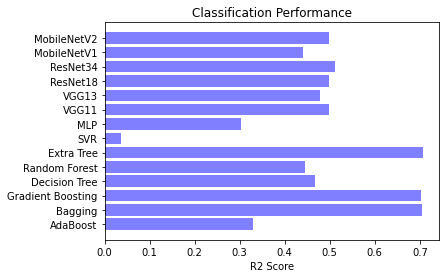

In [21]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()